<a href="https://colab.research.google.com/github/fmanid/channa-classification-using-M5stickV/blob/master/Testing_Model_channa_using_nasnetmobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Single Model .h5 Predictions**

---



1/1 [==============================] - 5s 5s/step
Predicted class: auranti
Confidence: 0.9994227886199951


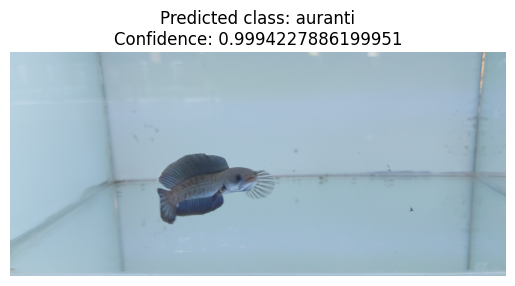

In [2]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the input image
image_path = '/content/drive/MyDrive/data testing/andrao/20230226_113816.jpg'

# Make prediction using the input image
predictions = predict_image(image_path)

# Mapping class index to class names
class_names = {
    0: 'andrao',
    1: 'asiatica',
    2: 'auranti',
    3: 'limbata',
    4: 'maru',
    5: 'pulchra',
    6: 'red',
    7: 'stewarti'
}

# Get the predicted class index and confidence
class_index = np.argmax(predictions)
confidence = predictions[0][class_index]

# Print the predicted class label and confidence
predicted_class = class_names[class_index]
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence}")

# Display the input image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')

# Add a title showing the predicted class and confidence
plt.title(f"Predicted class: {predicted_class}\nConfidence: {confidence}")
plt.show()


### **Testing model .h5**

---



---



---



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 115ms/step


,Image,Predicted Class,Confidence,Image Path
0,,auranti,0.934773,/content/drive/MyDrive/data testing/andrao/20230226_113842.jpg
1,,red,0.377616,/content/drive/MyDrive/data testing/andrao/20230226_113757.jpg
2,,auranti,0.999423,/content/drive/MyDrive/data testing/andrao/20230226_113816.jpg
3,,asiatica,0.595965,/content/drive/MyDrive/data testing/andrao/20230312_113910.jpg
4,,asiatica,0.898478,/content/drive/MyDrive/data testing/andrao/20230226_115602.jpg
5,,pulchra,0.608468,/content/drive/MyDrive/data testing/andrao/20230226_113808.jpg
6,,pulchra,0.886702,/content/drive/MyDrive/data testing/andrao/20230312_113825.jpg
7,,pulchra,0.454791,/content/drive/MyDrive/data testing/andrao/20230226_113810.jpg
8,,andrao,0.858998,/content/drive/MyDrive/data testing/andrao/20230312_113857.jpg
9,,asiatica,0.968427,/content/drive/MyDrive/data testing/andrao/20230312_113822.jpg

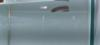
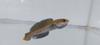
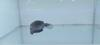
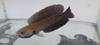
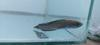
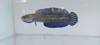
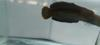
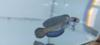
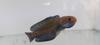
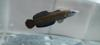
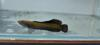
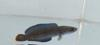
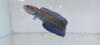
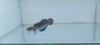
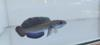
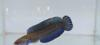
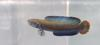
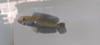
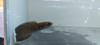
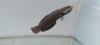

In [3]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/andrao'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64
def image_to_base64(image):
    from io import BytesIO
    import base64
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to absolute paths
df['Image Path'] = df['Image Path'].apply(lambda path: os.path.abspath(path))

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Insert the title "Testing Andrao" above the table
html_content = f'<h2>Testing Andrao</h2>{df.to_html(escape=False)}'

# Display the HTML content
display(HTML(html_content))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 112ms/step


,Image,Predicted Class,Confidence,Image Path
0,,asiatica,0.990679,/content/drive/MyDrive/data testing/asiatica/20230226_114924.jpg
1,,asiatica,0.990943,/content/drive/MyDrive/data testing/asiatica/20230226_115108.jpg
2,,asiatica,0.989530,/content/drive/MyDrive/data testing/asiatica/20230226_114929.jpg
3,,maru,0.999921,/content/drive/MyDrive/data testing/asiatica/20230226_114914.jpg
4,,asiatica,0.999911,/content/drive/MyDrive/data testing/asiatica/20230226_115101.jpg
5,,asiatica,0.629462,/content/drive/MyDrive/data testing/asiatica/20230226_115128.jpg
6,,asiatica,0.999648,/content/drive/MyDrive/data testing/asiatica/20230226_115113.jpg
7,,asiatica,0.981949,/content/drive/MyDrive/data testing/asiatica/20230226_115131.jpg
8,,asiatica,0.964717,/content/drive/MyDrive/data testing/asiatica/20230226_115124.jpg
9,,asiatica,0.878152,/content/drive/MyDrive/data testing/asiatica/20230226_115007.jpg

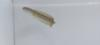
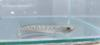
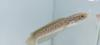
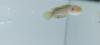
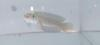
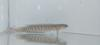
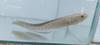
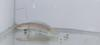
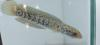
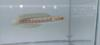
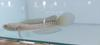
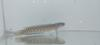
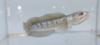
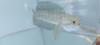
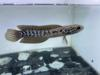
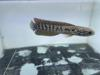
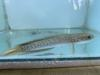
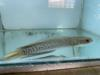
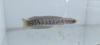
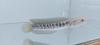

In [4]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/asiatica'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64
def image_to_base64(image):
    from io import BytesIO
    import base64
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to absolute paths
df['Image Path'] = df['Image Path'].apply(lambda path: os.path.abspath(path))

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Insert the title "Testing Asiatica" above the table
html_content = f'<h2>Testing Asiatica</h2>{df.to_html(escape=False)}'

# Display the HTML content
display(HTML(html_content))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 218ms/step


,Image,Predicted Class,Confidence,Image Path
0,,auranti,1.000000,/content/drive/MyDrive/data testing/auranti/20230226_105225.jpg
1,,asiatica,0.960475,/content/drive/MyDrive/data testing/auranti/20230226_105305.jpg
2,,auranti,1.000000,/content/drive/MyDrive/data testing/auranti/20230226_105251.jpg
3,,auranti,0.980331,/content/drive/MyDrive/data testing/auranti/20230226_105104.jpg
4,,auranti,1.000000,/content/drive/MyDrive/data testing/auranti/20230226_105113.jpg
5,,auranti,0.999724,/content/drive/MyDrive/data testing/auranti/20230226_105209.jpg
6,,auranti,0.999999,/content/drive/MyDrive/data testing/auranti/20230226_105459.jpg
7,,auranti,0.999995,/content/drive/MyDrive/data testing/auranti/20230226_105243.jpg
8,,auranti,0.997695,/content/drive/MyDrive/data testing/auranti/20230226_105342.jpg
9,,auranti,0.999998,/content/drive/MyDrive/data testing/auranti/20230226_105322.jpg

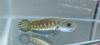
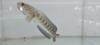
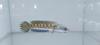
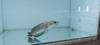
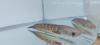
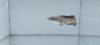
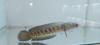
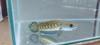
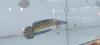
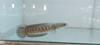
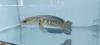
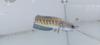
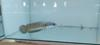
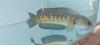
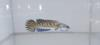
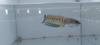
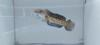
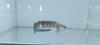
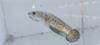
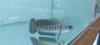

In [5]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/auranti'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64
def image_to_base64(image):
    from io import BytesIO
    import base64
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to absolute paths
df['Image Path'] = df['Image Path'].apply(lambda path: os.path.abspath(path))

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Insert the title "Testing Auranti" above the table
html_content = f'<h2>Testing Auranti</h2>{df.to_html(escape=False)}'

# Display the HTML content
display(HTML(html_content))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 106ms/step


,Image,Predicted Class,Confidence,Image Path
0,,pulchra,0.516217,/content/drive/MyDrive/data testing/limbata/1.jpg
1,,asiatica,0.999852,/content/drive/MyDrive/data testing/limbata/2.jpg
2,,maru,0.983794,/content/drive/MyDrive/data testing/limbata/5.jpg
3,,asiatica,0.879010,/content/drive/MyDrive/data testing/limbata/4.jpg
4,,asiatica,0.996291,/content/drive/MyDrive/data testing/limbata/11.jpg
5,,asiatica,0.999982,/content/drive/MyDrive/data testing/limbata/12.jpg
6,,limbata,0.999735,/content/drive/MyDrive/data testing/limbata/17.jpg
7,,asiatica,0.985931,/content/drive/MyDrive/data testing/limbata/8.jpg
8,,asiatica,0.993523,/content/drive/MyDrive/data testing/limbata/22.jpg
9,,maru,0.879372,/content/drive/MyDrive/data testing/limbata/3.jpg

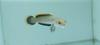
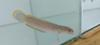
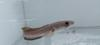
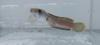
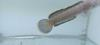
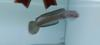
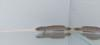
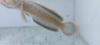
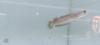
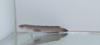
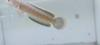
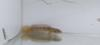
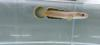
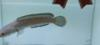
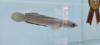
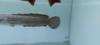
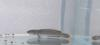
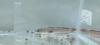
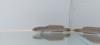
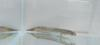

In [6]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/limbata'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64
def image_to_base64(image):
    from io import BytesIO
    import base64
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to absolute paths
df['Image Path'] = df['Image Path'].apply(lambda path: os.path.abspath(path))

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Insert the title "Testing Limbata" above the table
html_content = f'<h2>Testing Limbata</h2>{df.to_html(escape=False)}'

# Display the HTML content
display(HTML(html_content))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 399ms/step


,Image,Predicted Class,Confidence,Image Path
0,,maru,0.984563,/content/drive/MyDrive/data testing/maru/IMG_20230122_124331.jpg
1,,maru,0.998840,/content/drive/MyDrive/data testing/maru/IMG_20230122_124532.jpg
2,,maru,0.999658,/content/drive/MyDrive/data testing/maru/IMG_20230122_124510.jpg
3,,maru,1.000000,/content/drive/MyDrive/data testing/maru/IMG_20230122_124400.jpg
4,,maru,0.778039,/content/drive/MyDrive/data testing/maru/IMG_20230122_114236.jpg
5,,maru,0.999964,/content/drive/MyDrive/data testing/maru/IMG_20230122_124359.jpg
6,,maru,0.997756,/content/drive/MyDrive/data testing/maru/IMG_20230122_124431.jpg
7,,maru,0.999959,/content/drive/MyDrive/data testing/maru/IMG_20230122_124541.jpg
8,,maru,0.551908,/content/drive/MyDrive/data testing/maru/IMG_20230122_114243.jpg
9,,maru,0.888003,/content/drive/MyDrive/data testing/maru/IMG_20230122_124413.jpg

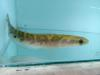
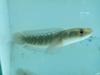
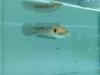
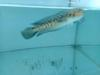
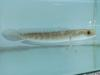
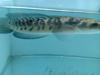
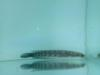
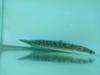
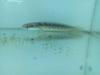
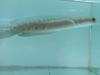
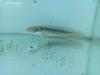
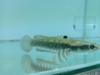
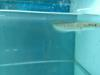
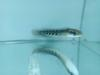
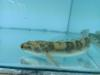
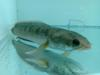
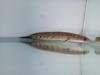
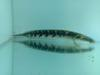
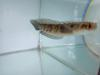
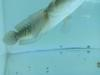

In [7]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/maru'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64
def image_to_base64(image):
    from io import BytesIO
    import base64
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to absolute paths
df['Image Path'] = df['Image Path'].apply(lambda path: os.path.abspath(path))

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Insert the title "Testing Maru" above the table
html_content = f'<h2>Testing Maru</h2>{df.to_html(escape=False)}'

# Display the HTML content
display(HTML(html_content))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 217ms/step


,Image,Predicted Class,Confidence,Image Path
0,,maru,0.615944,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133154.jpg
1,,maru,0.989600,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133153.jpg
2,,pulchra,0.981096,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133129.jpg
3,,auranti,0.550304,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133021.jpg
4,,pulchra,0.922905,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_132956.jpg
5,,auranti,0.346840,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_113600.jpg
6,,pulchra,0.568903,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133009.jpg
7,,maru,0.934907,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_124753.jpg
8,,maru,0.971180,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_124707.jpg
9,,red,0.533608,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_124812.jpg

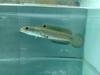
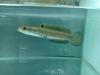
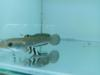
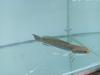
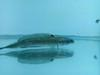
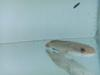
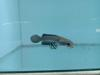
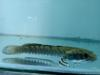
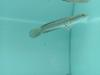
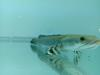
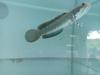
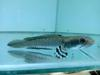
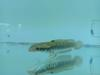
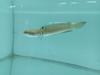
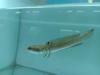
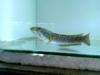
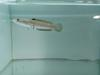
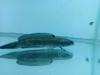
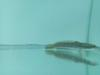
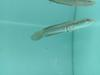

In [8]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/pulchra'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64
def image_to_base64(image):
    from io import BytesIO
    import base64
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to absolute paths
df['Image Path'] = df['Image Path'].apply(lambda path: os.path.abspath(path))

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Insert the title "Testing Pulchra" above the table
html_content = f'<h2>Testing Pulchra</h2>{df.to_html(escape=False)}'

# Display the HTML content
display(HTML(html_content))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 107ms/step


,Image,Predicted Class,Confidence,Image Path
0,,maru,0.942914,/content/drive/MyDrive/data testing/red/20230312_113212.jpg
1,,pulchra,0.460237,/content/drive/MyDrive/data testing/red/20230312_113320.jpg
2,,asiatica,0.842367,/content/drive/MyDrive/data testing/red/20230312_113404.jpg
3,,maru,0.990730,/content/drive/MyDrive/data testing/red/20230312_113150.jpg
4,,pulchra,0.560828,/content/drive/MyDrive/data testing/red/20230312_113201.jpg
5,,maru,0.576155,/content/drive/MyDrive/data testing/red/20230312_113203.jpg
6,,red,0.997862,/content/drive/MyDrive/data testing/red/20230312_113410.jpg
7,,red,0.990411,/content/drive/MyDrive/data testing/red/20230312_113154.jpg
8,,maru,0.475974,/content/drive/MyDrive/data testing/red/IMG_8189.jpg
9,,asiatica,0.999045,/content/drive/MyDrive/data testing/red/IMG_8190.jpg

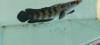
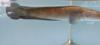
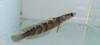
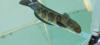
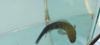
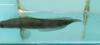
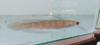
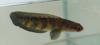
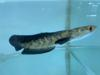
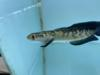
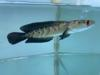
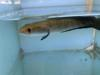
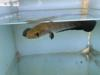
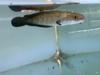
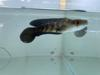
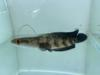
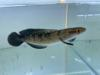
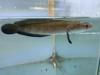
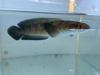
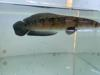

In [9]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/red'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64
def image_to_base64(image):
    from io import BytesIO
    import base64
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to absolute paths
df['Image Path'] = df['Image Path'].apply(lambda path: os.path.abspath(path))

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Insert the title "Testing Red" above the table
html_content = f'<h2>Testing Red</h2>{df.to_html(escape=False)}'

# Display the HTML content
display(HTML(html_content))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 228ms/step


,Image,Predicted Class,Confidence,Image Path
0,,stewarti,0.520586,/content/drive/MyDrive/data testing/stewarti/20230226_111519.jpg
1,,auranti,0.847499,/content/drive/MyDrive/data testing/stewarti/20230226_111413.jpg
2,,auranti,0.959491,/content/drive/MyDrive/data testing/stewarti/20230226_111524.jpg
3,,stewarti,0.919206,/content/drive/MyDrive/data testing/stewarti/20230226_110707.jpg
4,,asiatica,0.442104,/content/drive/MyDrive/data testing/stewarti/20230226_111514.jpg
5,,asiatica,0.854670,/content/drive/MyDrive/data testing/stewarti/20230226_111528.jpg
6,,asiatica,0.992004,/content/drive/MyDrive/data testing/stewarti/20230226_110651.jpg
7,,asiatica,0.975644,/content/drive/MyDrive/data testing/stewarti/20230226_111453.jpg
8,,auranti,0.419248,/content/drive/MyDrive/data testing/stewarti/20230226_110813.jpg
9,,asiatica,0.815980,/content/drive/MyDrive/data testing/stewarti/20230226_110624.jpg

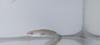
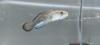
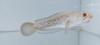
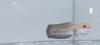
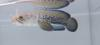
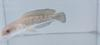
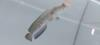
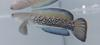
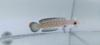
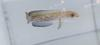
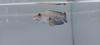
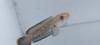
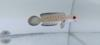
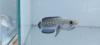
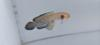
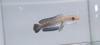
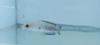
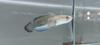
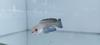
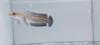

In [10]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/model (2).h5')

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/stewarti'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64
def image_to_base64(image):
    from io import BytesIO
    import base64
    with BytesIO() as buffer:
        image.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to absolute paths
df['Image Path'] = df['Image Path'].apply(lambda path: os.path.abspath(path))

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Insert the title "Testing stewarti" above the table
html_content = f'<h2>Testing Stewarti</h2>{df.to_html(escape=False)}'

# Display the HTML content
display(HTML(html_content))


**Testing model .tflite dengan data testing**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Image,Predicted Class,Confidence,Image Path
0,,auranti,0.934775,/content/drive/MyDrive/data testing/andrao/20230226_113842.jpg
1,,red,0.377610,/content/drive/MyDrive/data testing/andrao/20230226_113757.jpg
2,,auranti,0.999423,/content/drive/MyDrive/data testing/andrao/20230226_113816.jpg
3,,asiatica,0.595965,/content/drive/MyDrive/data testing/andrao/20230312_113910.jpg
4,,asiatica,0.898477,/content/drive/MyDrive/data testing/andrao/20230226_115602.jpg
5,,pulchra,0.608468,/content/drive/MyDrive/data testing/andrao/20230226_113808.jpg
6,,pulchra,0.886703,/content/drive/MyDrive/data testing/andrao/20230312_113825.jpg
7,,pulchra,0.454793,/content/drive/MyDrive/data testing/andrao/20230226_113810.jpg
8,,andrao,0.858999,/content/drive/MyDrive/data testing/andrao/20230312_113857.jpg
9,,asiatica,0.968428,/content/drive/MyDrive/data testing/andrao/20230312_113822.jpg

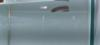
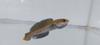
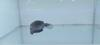
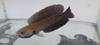
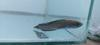
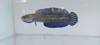
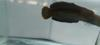
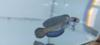
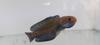
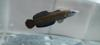
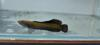
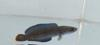
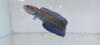
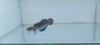
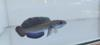
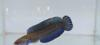
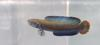
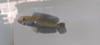
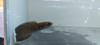
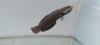

In [11]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/model/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    input_data = image.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/andrao'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64 format
def image_to_base64(image):
    import io
    import base64
    with io.BytesIO() as buffer:
        image.save(buffer, format='JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Set the table title
table_title = '<h2>Testing model .tflite Andrao</h2>'

# Display the DataFrame as a table with images and title
display(HTML(table_title + df.to_html(escape=False)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Image,Predicted Class,Confidence,Image Path
0,,asiatica,0.990678,/content/drive/MyDrive/data testing/asiatica/20230226_114924.jpg
1,,asiatica,0.990944,/content/drive/MyDrive/data testing/asiatica/20230226_115108.jpg
2,,asiatica,0.989530,/content/drive/MyDrive/data testing/asiatica/20230226_114929.jpg
3,,maru,0.999921,/content/drive/MyDrive/data testing/asiatica/20230226_114914.jpg
4,,asiatica,0.999911,/content/drive/MyDrive/data testing/asiatica/20230226_115101.jpg
5,,asiatica,0.629469,/content/drive/MyDrive/data testing/asiatica/20230226_115128.jpg
6,,asiatica,0.999648,/content/drive/MyDrive/data testing/asiatica/20230226_115113.jpg
7,,asiatica,0.981948,/content/drive/MyDrive/data testing/asiatica/20230226_115131.jpg
8,,asiatica,0.964718,/content/drive/MyDrive/data testing/asiatica/20230226_115124.jpg
9,,asiatica,0.878151,/content/drive/MyDrive/data testing/asiatica/20230226_115007.jpg

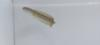
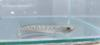
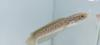
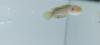
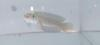
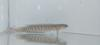
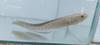
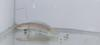
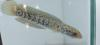
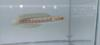
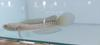
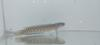
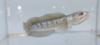
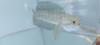
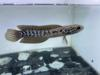
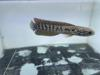
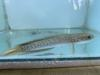
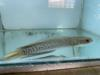
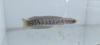
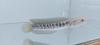

In [12]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/model/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    input_data = image.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/asiatica'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64 format
def image_to_base64(image):
    import io
    import base64
    with io.BytesIO() as buffer:
        image.save(buffer, format='JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Set the table title
table_title = '<h2>Testing model .tflite Asiatica</h2>'

# Display the DataFrame as a table with images and title
display(HTML(table_title + df.to_html(escape=False)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Image,Predicted Class,Confidence,Image Path
0,,auranti,1.000000,/content/drive/MyDrive/data testing/auranti/20230226_105225.jpg
1,,asiatica,0.960473,/content/drive/MyDrive/data testing/auranti/20230226_105305.jpg
2,,auranti,1.000000,/content/drive/MyDrive/data testing/auranti/20230226_105251.jpg
3,,auranti,0.980332,/content/drive/MyDrive/data testing/auranti/20230226_105104.jpg
4,,auranti,1.000000,/content/drive/MyDrive/data testing/auranti/20230226_105113.jpg
5,,auranti,0.999724,/content/drive/MyDrive/data testing/auranti/20230226_105209.jpg
6,,auranti,0.999999,/content/drive/MyDrive/data testing/auranti/20230226_105459.jpg
7,,auranti,0.999995,/content/drive/MyDrive/data testing/auranti/20230226_105243.jpg
8,,auranti,0.997695,/content/drive/MyDrive/data testing/auranti/20230226_105342.jpg
9,,auranti,0.999998,/content/drive/MyDrive/data testing/auranti/20230226_105322.jpg

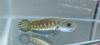
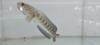
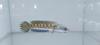
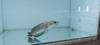
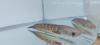
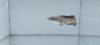
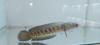
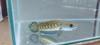
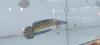
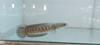
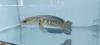
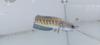
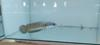
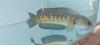
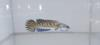
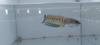
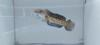
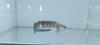
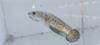
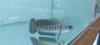

In [13]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/model/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    input_data = image.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/auranti'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64 format
def image_to_base64(image):
    import io
    import base64
    with io.BytesIO() as buffer:
        image.save(buffer, format='JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Set the table title
table_title = '<h2>Testing model .tflite Auranti</h2>'

# Display the DataFrame as a table with images and title
display(HTML(table_title + df.to_html(escape=False)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Image,Predicted Class,Confidence,Image Path
0,,pulchra,0.516215,/content/drive/MyDrive/data testing/limbata/1.jpg
1,,asiatica,0.999852,/content/drive/MyDrive/data testing/limbata/2.jpg
2,,maru,0.983793,/content/drive/MyDrive/data testing/limbata/5.jpg
3,,asiatica,0.879004,/content/drive/MyDrive/data testing/limbata/4.jpg
4,,asiatica,0.996291,/content/drive/MyDrive/data testing/limbata/11.jpg
5,,asiatica,0.999982,/content/drive/MyDrive/data testing/limbata/12.jpg
6,,limbata,0.999735,/content/drive/MyDrive/data testing/limbata/17.jpg
7,,asiatica,0.985931,/content/drive/MyDrive/data testing/limbata/8.jpg
8,,asiatica,0.993523,/content/drive/MyDrive/data testing/limbata/22.jpg
9,,maru,0.879370,/content/drive/MyDrive/data testing/limbata/3.jpg

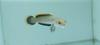
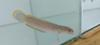
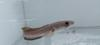
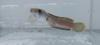
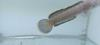
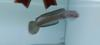
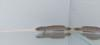
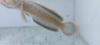
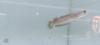
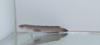
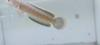
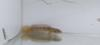
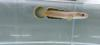
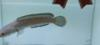
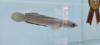
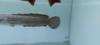
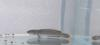
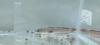
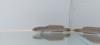
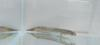

In [14]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/model/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    input_data = image.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/limbata'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64 format
def image_to_base64(image):
    import io
    import base64
    with io.BytesIO() as buffer:
        image.save(buffer, format='JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Set the table title
table_title = '<h2>Testing model .tflite Limbata</h2>'

# Display the DataFrame as a table with images and title
display(HTML(table_title + df.to_html(escape=False)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Image,Predicted Class,Confidence,Image Path
0,,maru,0.984564,/content/drive/MyDrive/data testing/maru/IMG_20230122_124331.jpg
1,,maru,0.998840,/content/drive/MyDrive/data testing/maru/IMG_20230122_124532.jpg
2,,maru,0.999658,/content/drive/MyDrive/data testing/maru/IMG_20230122_124510.jpg
3,,maru,1.000000,/content/drive/MyDrive/data testing/maru/IMG_20230122_124400.jpg
4,,maru,0.778039,/content/drive/MyDrive/data testing/maru/IMG_20230122_114236.jpg
5,,maru,0.999964,/content/drive/MyDrive/data testing/maru/IMG_20230122_124359.jpg
6,,maru,0.997756,/content/drive/MyDrive/data testing/maru/IMG_20230122_124431.jpg
7,,maru,0.999959,/content/drive/MyDrive/data testing/maru/IMG_20230122_124541.jpg
8,,maru,0.551901,/content/drive/MyDrive/data testing/maru/IMG_20230122_114243.jpg
9,,maru,0.888005,/content/drive/MyDrive/data testing/maru/IMG_20230122_124413.jpg

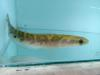
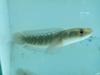
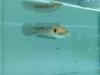
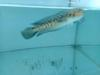
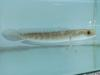
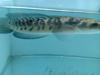
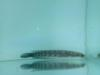
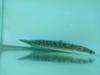
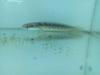
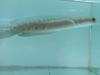
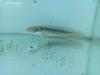
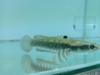
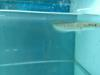
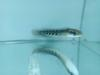
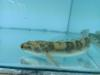
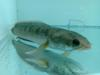
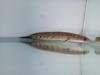
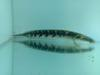
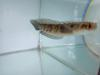
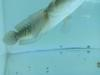

In [15]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/model/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    input_data = image.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/maru'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64 format
def image_to_base64(image):
    import io
    import base64
    with io.BytesIO() as buffer:
        image.save(buffer, format='JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Set the table title
table_title = '<h2>Testing model .tflite Maru</h2>'

# Display the DataFrame as a table with images and title
display(HTML(table_title + df.to_html(escape=False)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Image,Predicted Class,Confidence,Image Path
0,,maru,0.615937,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133154.jpg
1,,maru,0.989600,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133153.jpg
2,,pulchra,0.981095,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133129.jpg
3,,auranti,0.550298,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133021.jpg
4,,pulchra,0.922906,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_132956.jpg
5,,auranti,0.346841,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_113600.jpg
6,,pulchra,0.568908,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_133009.jpg
7,,maru,0.934906,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_124753.jpg
8,,maru,0.971181,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_124707.jpg
9,,red,0.533617,/content/drive/MyDrive/data testing/pulchra/IMG_20230122_124812.jpg

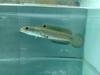
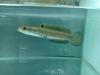
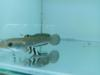
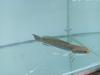
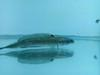
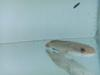
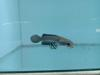
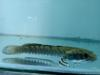
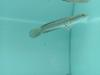
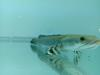
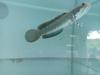
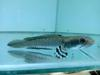
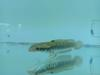
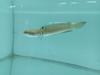
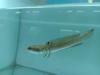
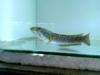
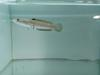
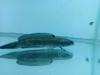
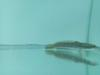
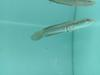

In [16]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/model/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    input_data = image.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/pulchra'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64 format
def image_to_base64(image):
    import io
    import base64
    with io.BytesIO() as buffer:
        image.save(buffer, format='JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Set the table title
table_title = '<h2>Testing model .tflite Pulchra</h2>'

# Display the DataFrame as a table with images and title
display(HTML(table_title + df.to_html(escape=False)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Image,Predicted Class,Confidence,Image Path
0,,maru,0.942916,/content/drive/MyDrive/data testing/red/20230312_113212.jpg
1,,pulchra,0.460227,/content/drive/MyDrive/data testing/red/20230312_113320.jpg
2,,asiatica,0.842363,/content/drive/MyDrive/data testing/red/20230312_113404.jpg
3,,maru,0.990730,/content/drive/MyDrive/data testing/red/20230312_113150.jpg
4,,pulchra,0.560828,/content/drive/MyDrive/data testing/red/20230312_113201.jpg
5,,maru,0.576155,/content/drive/MyDrive/data testing/red/20230312_113203.jpg
6,,red,0.997862,/content/drive/MyDrive/data testing/red/20230312_113410.jpg
7,,red,0.990411,/content/drive/MyDrive/data testing/red/20230312_113154.jpg
8,,maru,0.475983,/content/drive/MyDrive/data testing/red/IMG_8189.jpg
9,,asiatica,0.999045,/content/drive/MyDrive/data testing/red/IMG_8190.jpg

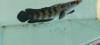
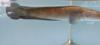
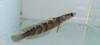
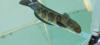
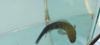
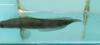
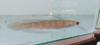
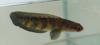
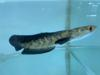
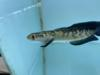
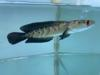
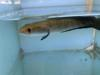
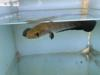
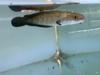
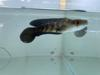
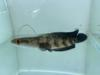
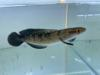
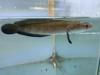
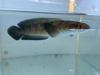
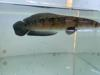

In [17]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/model/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    input_data = image.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/red'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64 format
def image_to_base64(image):
    import io
    import base64
    with io.BytesIO() as buffer:
        image.save(buffer, format='JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Set the table title
table_title = '<h2>Testing model .tflite Red</h2>'

# Display the DataFrame as a table with images and title
display(HTML(table_title + df.to_html(escape=False)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Image,Predicted Class,Confidence,Image Path
0,,stewarti,0.520584,/content/drive/MyDrive/data testing/stewarti/20230226_111519.jpg
1,,auranti,0.847499,/content/drive/MyDrive/data testing/stewarti/20230226_111413.jpg
2,,auranti,0.959490,/content/drive/MyDrive/data testing/stewarti/20230226_111524.jpg
3,,stewarti,0.919209,/content/drive/MyDrive/data testing/stewarti/20230226_110707.jpg
4,,asiatica,0.442100,/content/drive/MyDrive/data testing/stewarti/20230226_111514.jpg
5,,asiatica,0.854667,/content/drive/MyDrive/data testing/stewarti/20230226_111528.jpg
6,,asiatica,0.992004,/content/drive/MyDrive/data testing/stewarti/20230226_110651.jpg
7,,asiatica,0.975644,/content/drive/MyDrive/data testing/stewarti/20230226_111453.jpg
8,,auranti,0.419244,/content/drive/MyDrive/data testing/stewarti/20230226_110813.jpg
9,,asiatica,0.815974,/content/drive/MyDrive/data testing/stewarti/20230226_110624.jpg

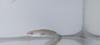
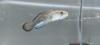
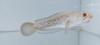
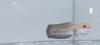
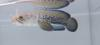
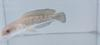
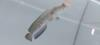
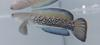
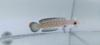
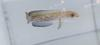
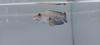
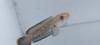
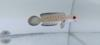
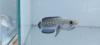
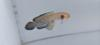
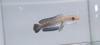
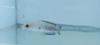
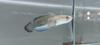
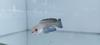
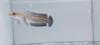

In [18]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/model/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to match the model's input shape
    image = image.convert('RGB')  # Convert the image to RGB color mode
    image = np.array(image)  # Convert PIL image to NumPy array
    image = image / 255.0  # Normalize pixel values to the range of 0 and 1
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Make predictions
def predict_image(image_path):
    image = preprocess_image(image_path)

    # Set input tensor
    input_data = image.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Path to the folder containing the images in Google Drive
folder_path = '/content/drive/MyDrive/data testing/stewarti'

# Initialize a list to store the predicted class labels and confidence scores
predicted_classes = []
confidences = []
image_paths = []

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)

        # Make prediction using the input image
        predictions = predict_image(image_path)

        # Assuming the model predicts a single class label
        class_index = np.argmax(predictions)
        confidence = predictions[0][class_index]

        # Mapping class index to class names
        class_names = {
            0: 'andrao',
            1: 'asiatica',
            2: 'auranti',
            3: 'limbata',
            4: 'maru',
            5: 'pulchra',
            6: 'red',
            7: 'stewarti'
        }

        # Get the predicted class label
        predicted_class = class_names[class_index]

        # Append the predicted class label and confidence score to the lists
        predicted_classes.append(predicted_class)
        confidences.append(confidence)

# Create a Pandas DataFrame to store the predicted class labels, confidence scores, and image paths
data = {'Predicted Class': predicted_classes, 'Confidence': confidences, 'Image Path': image_paths}
df = pd.DataFrame(data)

# Function to create HTML tag for displaying image in table cell
def image_cell(row):
    image_path = row['Image Path']
    image = Image.open(image_path)
    image.thumbnail((100, 100))
    return f'<img src="data:image/jpeg;base64,{image_to_base64(image)}">'

# Function to convert image to base64 format
def image_to_base64(image):
    import io
    import base64
    with io.BytesIO() as buffer:
        image.save(buffer, format='JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

# Convert the image paths to image cells
df['Image'] = df.apply(image_cell, axis=1)

# Set the desired order of columns
column_order = ['Image', 'Predicted Class', 'Confidence', 'Image Path']
df = df[column_order]

# Set the table title
table_title = '<h2>Testing model .tflite Stewarti</h2>'

# Display the DataFrame as a table with images and title
display(HTML(table_title + df.to_html(escape=False)))
